In [63]:

#import packages

import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from wordcloud import WordCloud,STOPWORDS



In [29]:

#Task A - Question 1
#There are 3 files in the dataset corresponding to the feature matrix, the class labels and the term dictionary.
#You need to read these files in Python notebook and store in variables X, trueLabels, and terms. 

X = pd.read_csv('bbcsport_mtx.csv', delimiter=',', header=None).values
print(X.shape)
trueLabels = pd.read_csv('bbcsport_classes.csv', delimiter=',', header=None).values
print(trueLabels.shape)
terms = pd.read_csv('bbcsport_terms.csv', delimiter=',', header=None).values
print(terms.shape)


(737, 4613)
(737, 1)
(4613, 1)


In [35]:

#Task A - Question 2
#Next perform K-means clustering with 5 clusters using Euclidean distance as similarity measure. 
#Evaluate the clustering performance using adjusted rand index and adjusted mutual information.
#Report the clustering performance averaged over 50 random initializations of K-means

mutual_information = []
rand_index = []
centroid = []

for i in range(50):
    kmeans = KMeans(n_clusters=5, init = "random")
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_
    labels    = kmeans.labels_
    mutual_information.append(adjusted_mutual_info_score(trueLabels[:,0], labels))
    rand_index.append(adjusted_rand_score(trueLabels[:,0], labels))
    centroid.append(centroids)
    
print("Average Adjusted Mutual Information - ",np.mean(mutual_information))
print("Average Adjusted Rand Index - ",np.mean(rand_index))


Average Adjusted Mutual Information -  0.13800158792963005
Average Adjusted Rand Index -  0.0741493939157125


In [36]:

#Task A - Question 3
#Repeat K-means clustering with 5 clusters using a similarity measure other than Euclidean distance. 
#Evaluate the clustering performance over 50 random initializations of K-means using adjusted rand index and adjusted mutual information.
#Report the clustering performance and compare it with the results obtained in step 2

X_Norm = preprocessing.normalize(X)

c_mutual_information = []
c_rand_index = []

for i in range(50):
    kmeans = KMeans(n_clusters=5, init = "random")
    kmeans.fit(X_Norm)
    centroids = kmeans.cluster_centers_
    labels    = kmeans.labels_
    c_mutual_information.append(adjusted_mutual_info_score(trueLabels[:,0], labels))
    c_rand_index.append(adjusted_rand_score(trueLabels[:,0], labels))
    centroid.append(centroids)
    
print("Average Adjusted Mutual Information - ",np.mean(c_mutual_information))
print("Average Adjusted Rand Index - ",np.mean(c_rand_index))


Average Adjusted Mutual Information -  0.7914615331979443
Average Adjusted Rand Index -  0.7911672589228705


[array([[ 4.28571429e-02,  1.42857143e-02,  1.41428571e+00, ...,
        -1.04083409e-17,  3.46944695e-18,  6.07153217e-18],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.03703704e-02,  5.55555556e-03,  6.81481481e-01, ...,
         9.25925926e-03,  1.29629630e-02,  7.40740741e-03],
       [-1.73472348e-17,  5.66037736e-02,  2.00000000e+00, ...,
        -5.20417043e-18, -8.67361738e-18,  0.00000000e+00],
       [ 1.04083409e-17,  1.36986301e-02,  1.72602740e+00, ...,
        -1.04083409e-17,  5.20417043e-18,  6.93889390e-18]]), array([[ 1.92719486e-02,  6.42398287e-03,  5.91006424e-01, ...,
         4.28265525e-03,  4.28265525e-03,  4.28265525e-03],
       [-1.73472348e-17, -5.20417043e-18,  1.76744186e+00, ...,
        -8.67361738e-19, -8.67361738e-18, -2.60208521e-18],
       [-1.38777878e-17,  1.05263158e-01,  2.34210526e+00, ...,
         1.73472348e-18, -6.93889390e-18, -2.60208521e-18],
     

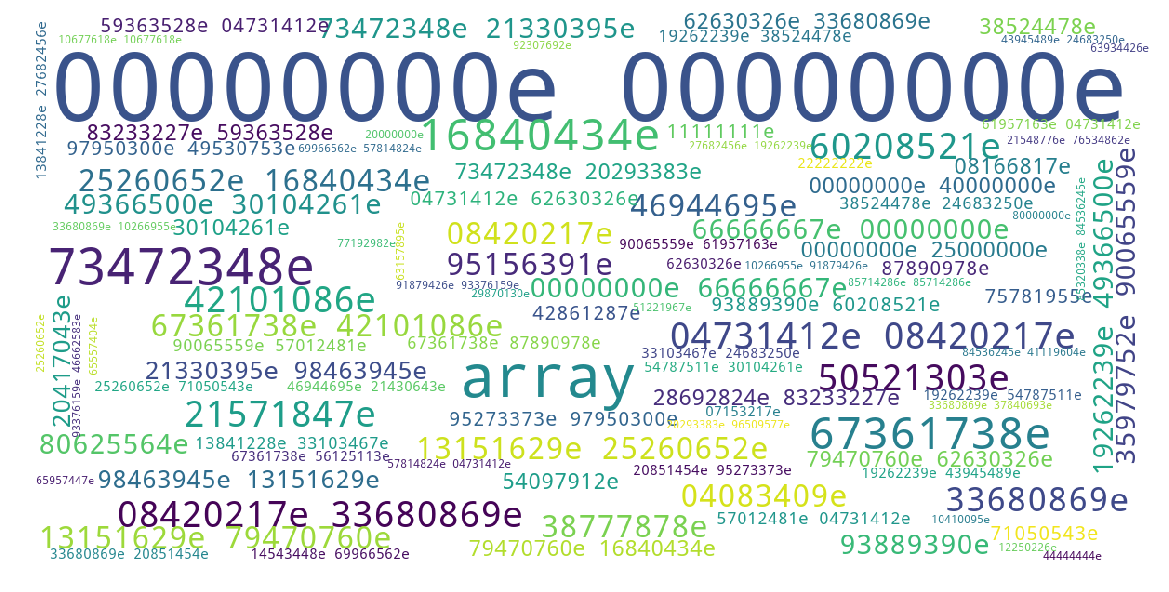

In [65]:

#Task A - Question 4
#For clustering cases (Euclidean distance and the other similarity measure), 
#visualize the cluster centres using Tag cloud using Python package WordCloud. 


centroids= kmeans.cluster_centers_
print(centroid)

stopwords= set(STOPWORDS)
def Mywordcloud(data,title = None):
    wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=200,
                         max_font_size=40,scale=3,random_state=1).generate(str(data))
    fig = plt.figure(1,figsize=(20,20))
    plt.axis('off')
    if title:
        fig.suptitle(title,fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()
    
Mywordcloud(centroid)


C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


[1.50890250e-02 1.28848532e-02 1.16306533e-02 1.00904774e-02
 9.56751519e-03 8.72552714e-03 8.52878334e-03 8.18103712e-03
 7.68505624e-03 7.25113952e-03 7.16023328e-03 6.49157415e-03
 6.42773699e-03 6.32654380e-03 6.15030742e-03 5.70733352e-03
 5.64359575e-03 5.50992108e-03 5.46076488e-03 5.36609265e-03
 5.23770926e-03 4.87330836e-03 4.84097905e-03 4.73872543e-03
 4.58494106e-03 4.52491151e-03 4.43956329e-03 4.37281752e-03
 4.31263105e-03 4.25796335e-03 4.23526993e-03 4.05756006e-03
 3.99890678e-03 3.98526123e-03 3.93518029e-03 3.90002659e-03
 3.85344921e-03 3.82305806e-03 3.78408651e-03 3.76097742e-03
 3.67592833e-03 3.64108989e-03 3.61984112e-03 3.60020149e-03
 3.53944636e-03 3.49980399e-03 3.44410000e-03 3.43224279e-03
 3.39606158e-03 3.38236849e-03 3.37092685e-03 3.34168215e-03
 3.29034410e-03 3.28949108e-03 3.27134585e-03 3.24153061e-03
 3.21682052e-03 3.18894254e-03 3.14741255e-03 3.13414554e-03
 3.11473970e-03 3.09489633e-03 3.07719035e-03 3.05038193e-03
 3.03872549e-03 3.028493

Text(0,0.5,'Variance captured')

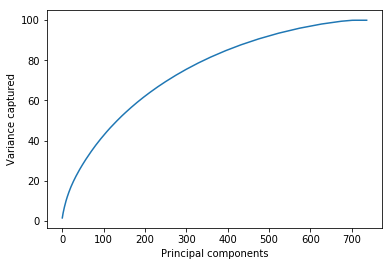

In [4]:

#Task B
#For the provided BBC sports dataset, perform PCA and plot the captured variance with respect to increasing latent dimensionality. 
#What is the minimum dimension that captures (a) at least 95% variance and (b) at least 98% variance?

Xnorm = scale(X)
pca = PCA(n_components=4613)
pca.fit(Xnorm)
var= pca.explained_variance_ratio_
print(var)
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)
plt.plot(var1)
plt.xlabel("Principal components")
plt.ylabel("Variance captured")
